## import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## set path


In [2]:
datadir = '/Users/alexbarnett/Documents/Community_detection/hippo_nets/'

## load data

In [3]:
participation_data = pd.read_csv(datadir+'fmriprep_9p_DMN_nodes_PC.csv')
PC_DMN_data = pd.read_excel(datadir+'PC_DMN.xlsx')

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


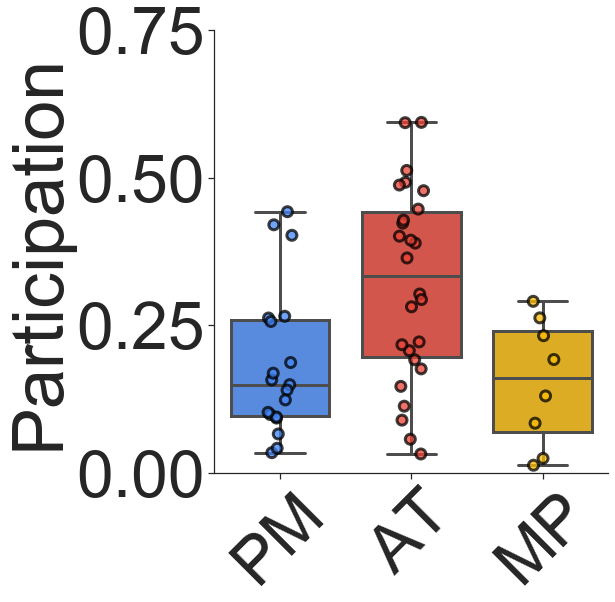

In [4]:
plt.figure(figsize=(10,10))
sns.set(font_scale=6)
sns.set_style("ticks")

exclude_thresh=23.10558347 #the threshold for bottom 25 percentile fc strength on the whole matrix

labels = ["PM","AT","MP"]
colors = ['#4285F4','#EA4335','#FBBC05']
figure_one = sns.boxplot(x = "community", y = "whole_brain_avg_PC", data = participation_data[participation_data["community"]>3][participation_data["whole_brain_strength"]>exclude_thresh],  palette = colors, order =[5,4,6], linewidth=3, width = .75)
sns.stripplot(x = "community", y = "whole_brain_avg_PC", data = participation_data[participation_data["community"]>3][participation_data["whole_brain_strength"]>exclude_thresh], edgecolor="black",linewidth=3,size=10,alpha = .75,jitter = 0.1,palette = colors, order =[5,4,6])
sns.despine()
figure_one.set(xlabel="", ylabel="Participation")
figure_one.set_xticklabels(labels,rotation=45)
figure_one.set_ylim(0,.75)


fig = figure_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"network_participation_DMN_to_wholebrain.pdf",dpi=300)

In [5]:
#AT v MP
md = ols('whole_brain_avg_PC~community_name',participation_data[participation_data["whole_brain_strength"]>exclude_thresh][participation_data["community"].isin([4,6])])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

                  sum_sq    df         F   PR(>F)
community_name  0.170445   1.0  7.190911  0.01149
Residual        0.758491  32.0       NaN      NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
#AT v PM
md = ols('whole_brain_avg_PC~community_name',participation_data[participation_data["whole_brain_strength"]>exclude_thresh][participation_data["community"].isin([4,5])])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

                  sum_sq    df         F    PR(>F)
community_name  0.203176   1.0  9.087078  0.004306
Residual        0.961426  43.0       NaN       NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
#PM v MP
md = ols('whole_brain_avg_PC~community_name',participation_data[participation_data["whole_brain_strength"]>exclude_thresh][participation_data["community"].isin([5,6])])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

                  sum_sq    df         F    PR(>F)
community_name  0.005366   1.0  0.369124  0.548962
Residual        0.363418  25.0       NaN       NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


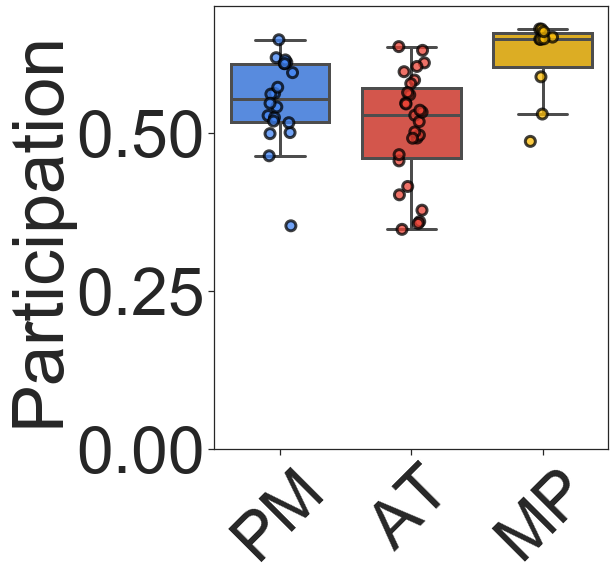

In [8]:
plt.figure(figsize=(10,10))
sns.set(font_scale=6)
sns.set_style("ticks")

exclude_thresh = np.percentile(np.array(PC_DMN_data['strength']),25)

labels = ["PM","AT","MP"]
colors = ['#4285F4','#EA4335','#FBBC05']
figure_one = sns.boxplot(x = "community", y = "PC", data = PC_DMN_data[PC_DMN_data['strength']>exclude_thresh],  palette = colors, order =[2,1,3], linewidth=3, width = .75,fliersize=0)
sns.stripplot(x = "community", y = "PC", data = PC_DMN_data[PC_DMN_data['strength']>exclude_thresh], edgecolor="black",linewidth=3,size=10,alpha = .75,jitter = 0.1,palette = colors, order =[2,1,3])
figure_one.set(xlabel="", ylabel="Participation")
figure_one.set_xticklabels(labels,rotation=45)
figure_one.set_ylim(0,.7)

fig = figure_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(datadir+"within_network_participation_dmnonly.pdf",dpi=300)


In [9]:
#AT v PM
md = ols('PC~community',PC_DMN_data[PC_DMN_data['community']!=3][PC_DMN_data['strength']>exclude_thresh])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

             sum_sq    df         F  PR(>F)
community  0.019338   1.0  3.103848  0.0849
Residual   0.280363  45.0       NaN     NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
#AT v MP
md = ols('PC~community',PC_DMN_data[PC_DMN_data['community']!=2][PC_DMN_data['strength']>exclude_thresh])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

             sum_sq    df          F    PR(>F)
community  0.088883   1.0  13.568623  0.000771
Residual   0.229272  35.0        NaN       NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
#PM v MP
md = ols('PC~community',PC_DMN_data[PC_DMN_data['community']!=1][PC_DMN_data['strength']>exclude_thresh])
mdf = md.fit()
table = anova_lm(mdf, typ=2)
print(table)

             sum_sq    df         F    PR(>F)
community  0.032052   1.0  7.309086  0.011531
Residual   0.122787  28.0       NaN       NaN


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
